# Análise Exploratória de Dados (EDA)

### Importação das bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Configurações

In [32]:
# Definindo a paleta de cores
colors = ['#ff0c13', '#ff3339','#FF5A5F', '#ff8185', '#ffa8ab']

cores_latam = {'Argentina':'#6CACE4',
       'Brasil':'#009739',
       'Colômbia':'#FFCD00',
       'México':'#C8102E'}

sns.set_palette(colors)

### Leitura e tratamento de dados

Nos foi disponibilizados 1 arquivo .XLSX com 3 páginas.

In [33]:
xlsx = pd.ExcelFile('Airbnb.xlsx')
xlsx.sheet_names

['Imoveis', 'Fluxo de reserva de imóvel - Br', 'Retenção de imóveis']

Para a análise, iremos investigar a tabela `Imoveis`

In [34]:
imoveis_df = xlsx.parse('Imoveis')
imoveis_df.head()

,Nome do local,Localização,País,Tipo de acomodação,Classificação,Comodidades,Políticas de cancelamento,Preço,Número de reservas no ano,Número de Fotos
0,Hostel Montanha,San Andrés,Colômbia,Hostel,5 estrelas,"Wi-Fi, café da manhã",7 dias antes,30,11,5
1,Mirliban,Buenos Aires,Argentina,Apartamento,5 estrelas,"Wi-Fi, ar condicionado",72 horas,10,25,7
2,Estrela Dourada,Guadalajara,México,Hotel,5 estrelas,"Piscina, recepção",reembolsável,14,73,12
3,Mar Azul Beach,Fortaleza,Brasil,Hotel,5 estrelas,"Wi-Fi, armários",48 horas antes,35,162,2
4,Montanha Mágica,Curitiba,Brasil,Quarto,4 estrelas,"Piscina, churrasqueira",7 dias antes,48,200,2


In [35]:
imoveis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Nome do local              49 non-null     object
 1   Localização                49 non-null     object
 2   País                       49 non-null     object
 3   Tipo de acomodação         49 non-null     object
 4   Classificação              49 non-null     object
 5   Comodidades                49 non-null     object
 6   Políticas de cancelamento  49 non-null     object
 7   Preço                      49 non-null     int64 
 8   Número de reservas no ano  49 non-null     int64 
 9   Número de Fotos            49 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 4.0+ KB


Não há nenhum dado nulo.

Irei alterar o tipo de dado da coluna `Classificação` para um tipo `int` para fazer análises:

In [36]:
imoveis_df['Classificação'] = imoveis_df['Classificação'].str[0]
imoveis_df['Classificação'] = imoveis_df['Classificação'].astype(int)

## **Análise Exploratória dos Dados**

### **Tabela `Imóveis`**

##### **Dicionario de dados**

- **Nome do local**: Nome da acomodação

- **Localização**: Endereço da acomodação

- **País**: País da acomodação

- **Tipo de acomodação**: Classificação do local

- **Classificação**: Avaliação média do local

- **Comodidades**: Serviços oferecidos

- **Políticas de cancelamento**: Termos para cancelar uma reserva

- **Preço**: Valor (U$) por noite.

- **Número de reservas no ano**: Quantas vezes a propriedade foi reservada.

- **Número de Fotos**: Quantidade de imagens da propriedade.

#### **Nome do local**

In [37]:
imoveis_df['Nome do local'].describe()

count                  49
unique                 49
top       Hostel Montanha
freq                    1
Name: Nome do local, dtype: object

O `Nome do local` é exclusivo para cada registro

#### **Localização**

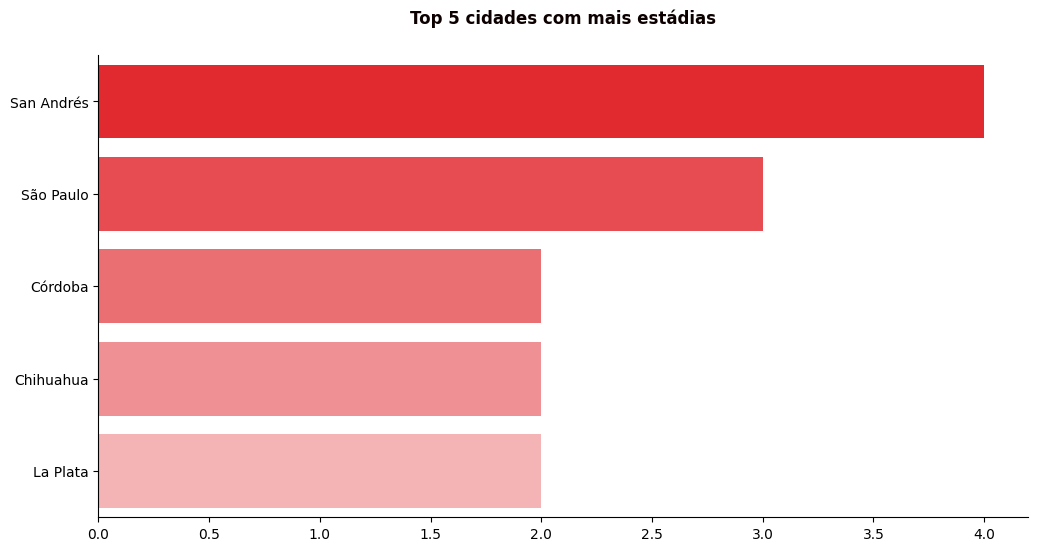

In [62]:
order = imoveis_df['Localização'].value_counts().head().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(imoveis_df, y='Localização', order=order, palette=['#ff0c13', '#ff3339','#FF5A5F', '#ff8185', '#ffa8ab'])
plt.title('Top 5 cidades com mais estádias', fontsize=12, fontweight='bold', y=1.05, color='#0c0000')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

In [61]:
imoveis_df['Localização'].value_counts().value_counts()

count
2    21
4     1
3     1
Name: count, dtype: int64

A cidade de San Andrés é nossa moda com 4 acomodações, seguido de São Paulo com 3.

Todas as outras cidades possuem 2 acomodações cada.

#### **País**

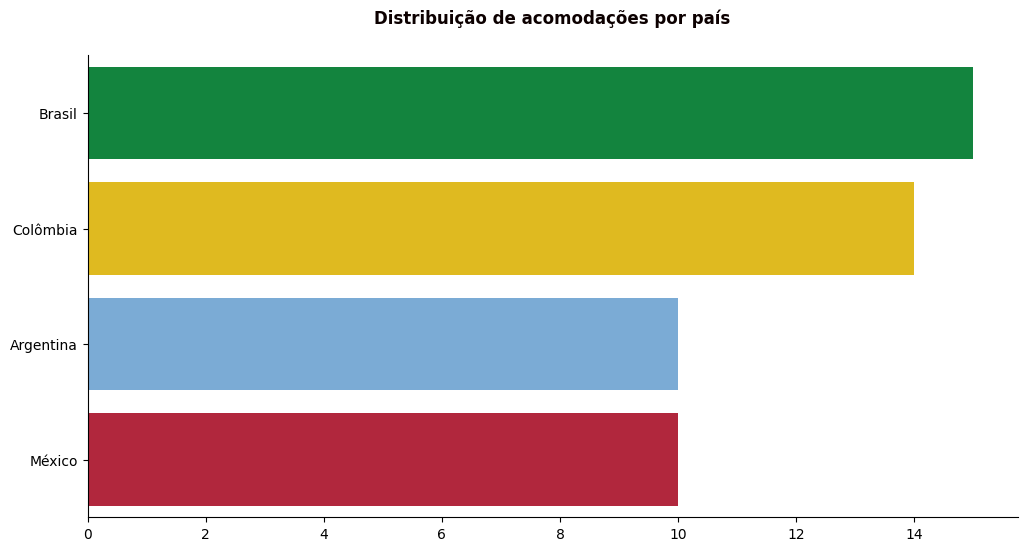

In [63]:
order = imoveis_df['País'].value_counts().head().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(imoveis_df, y='País', order=order, palette=cores_latam)
plt.title('Distribuição de acomodações por país', fontsize=12, fontweight='bold', y=1.05, color='#0c0000')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

O Brasil é a nossa moda com 15 acomodações, seguido por Colômbia com 14 e Argentina e México com 10 acomodações cada.

#### **Tipo de acomodação**

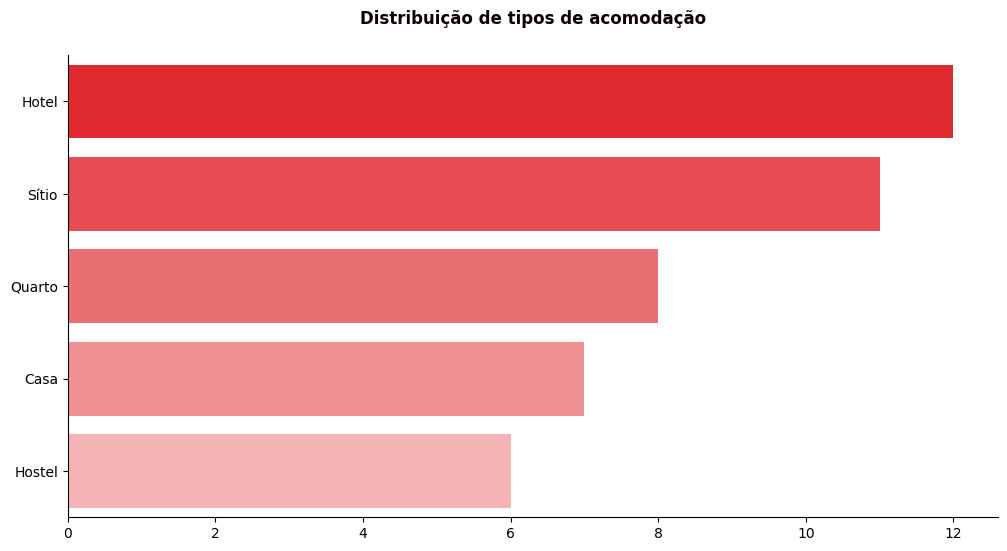

In [68]:
order = imoveis_df['Tipo de acomodação'].value_counts().head().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(imoveis_df, y='Tipo de acomodação', order=order)
plt.title('Distribuição de tipos de acomodação', fontsize=12, fontweight='bold', y=1.05, color='#0c0000')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

Hotel é o tipo de acomodação mais frequente em nosso dataset, seguido por sítio e quarto

#### **Classificação**

/home/matheus/.pyenv/versions/3.11.4/envs/python-alura/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


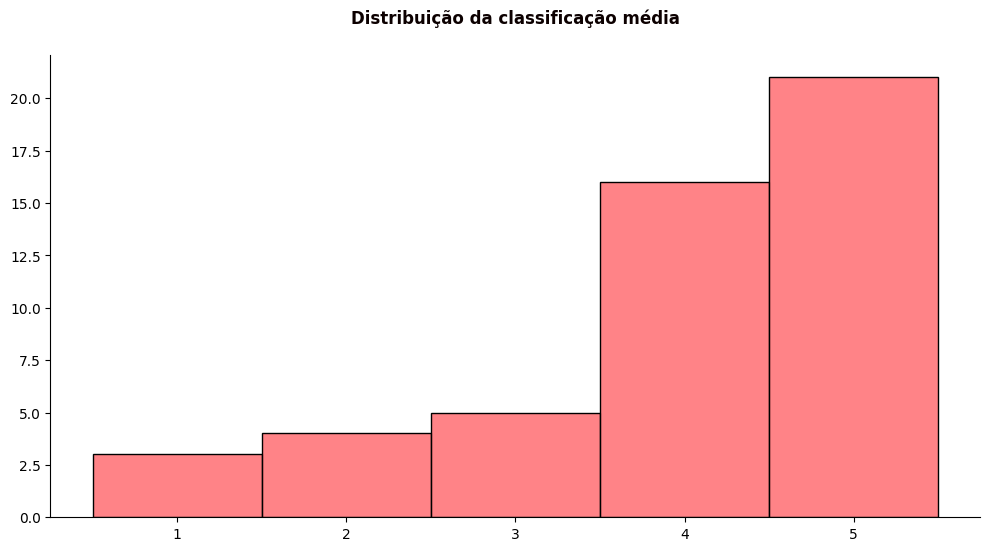

In [69]:
order = imoveis_df['Classificação'].value_counts().index
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# Plotando
plt.figure(figsize=(12,6))
sns.histplot(imoveis_df, x='Classificação', bins=bins, color='#ff5a5f')
plt.title('Distribuição da classificação média', fontsize=12, fontweight='bold', y=1.05, color='#0c0000')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

In [43]:
imoveis_df['Classificação'].describe()

count    49.000000
mean      3.979592
std       1.198781
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Classificação, dtype: float64

A maioria das acomodações possuem boas notas, 5 e 4, mas devemos ficar atentos com acomodações com notas inferiores.

#### **Comodidades**

Para fazer a análise individual dos serviços mais frequentes, teremos que "explodir" nossa coluna para poder fazer a contagem

In [44]:
imoveis_df['Comodidades'] = imoveis_df.pop('Comodidades').str.split(',')

comodidades_exploded = imoveis_df.explode('Comodidades')
comodidades_exploded['Comodidades'] = comodidades_exploded['Comodidades'].str.lower()

comodidades_exploded.head()

,Nome do local,Localização,País,Tipo de acomodação,Classificação,Políticas de cancelamento,Preço,Número de reservas no ano,Número de Fotos,Comodidades
0,Hostel Montanha,San Andrés,Colômbia,Hostel,5,7 dias antes,30,11,5,wi-fi
0,Hostel Montanha,San Andrés,Colômbia,Hostel,5,7 dias antes,30,11,5,café da manhã
1,Mirliban,Buenos Aires,Argentina,Apartamento,5,72 horas,10,25,7,wi-fi
1,Mirliban,Buenos Aires,Argentina,Apartamento,5,72 horas,10,25,7,ar condicionado
2,Estrela Dourada,Guadalajara,México,Hotel,5,reembolsável,14,73,12,piscina


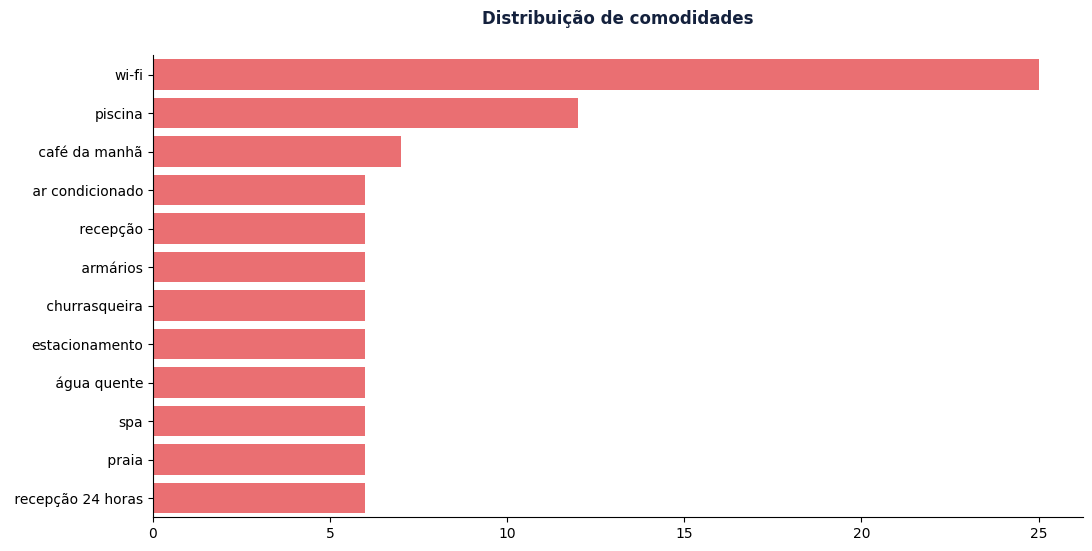

In [74]:
order = comodidades_exploded['Comodidades'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(comodidades_exploded, y='Comodidades', order=order, color='#ff5a5f')
plt.title('Distribuição de comodidades', fontsize=12, fontweight='bold', y=1.05, color='#14213d')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

Podemos observar que a comodidade mais comum é "wi-fi", enquanto "piscina" e "café da manhã" seguem logo atrás.

#### **Políticas de cancelamento**

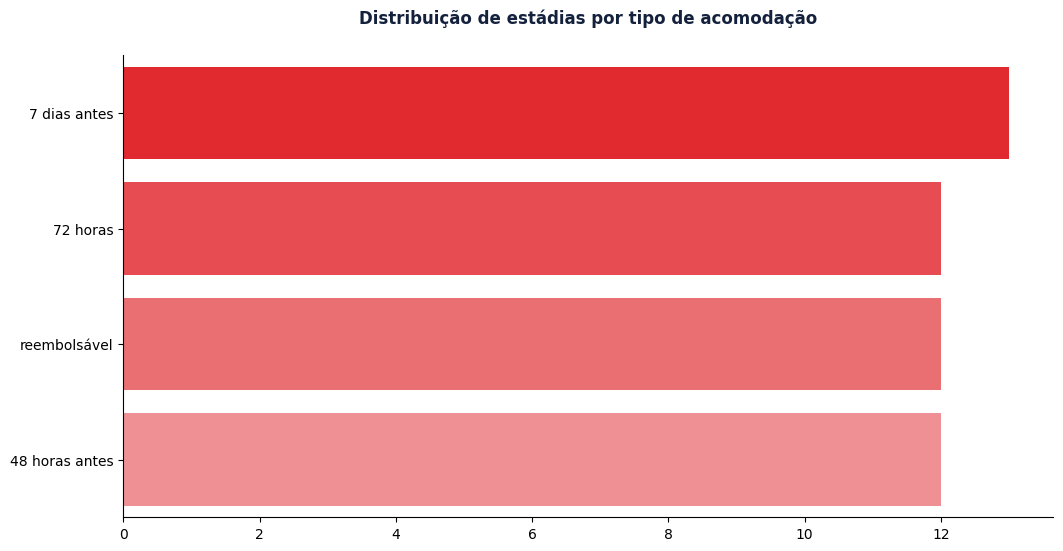

In [46]:
order = imoveis_df['Políticas de cancelamento'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(imoveis_df, y='Políticas de cancelamento', order=order)
plt.title('Distribuição de estádias por tipo de acomodação', fontsize=12, fontweight='bold', y=1.05, color='#14213d')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

A distribuição das políticas de cancelamento são praticamente iguais.

#### **Preço**

/home/matheus/.pyenv/versions/3.11.4/envs/python-alura/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


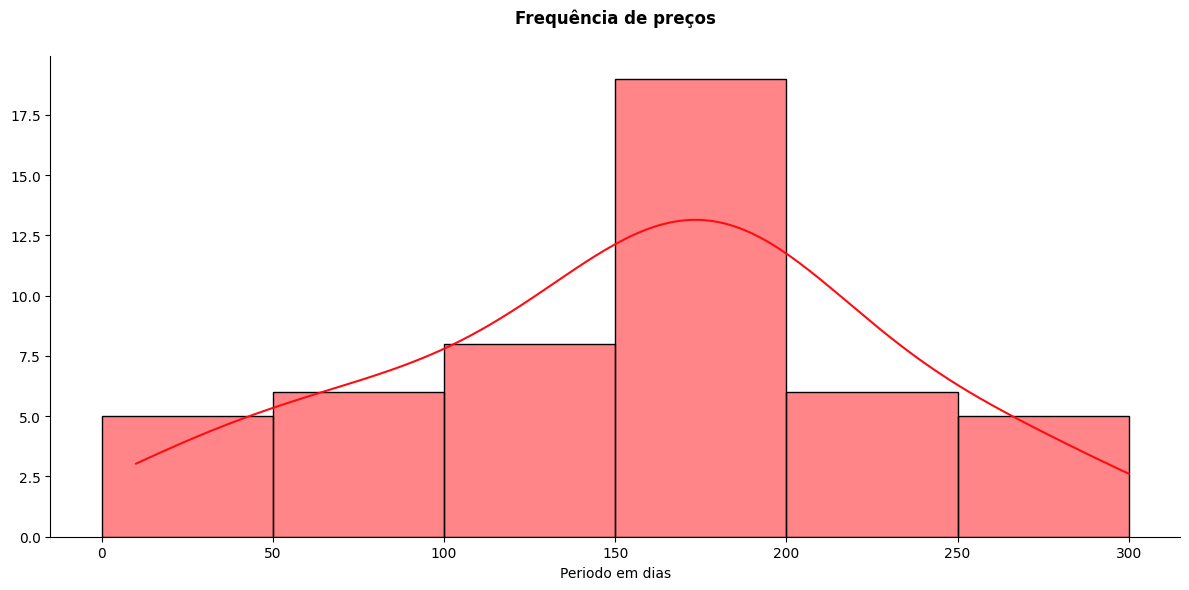

In [47]:
bins = list(range(0,301,50))

# Plotando
plt.figure(figsize=(12,6))
sns.histplot(imoveis_df, x='Preço', bins=bins, kde=True)
plt.title('Frequência de preços', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('Periodo em dias')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()
plt.show()

In [48]:
imoveis_df['Preço'].describe()

count     49.000000
mean     157.122449
std       71.983978
min       10.000000
25%      114.000000
50%      163.000000
75%      199.000000
max      300.000000
Name: Preço, dtype: float64

Podemos observar que o gráfico se assemelha a uma distribuição normal, onde a mediana e a média são praticamente iguais, U$ 163 e U$ 157, e os valores se distribuem em seu entorno.

O valor minimo é de US 10 e o valor máximo de U$ 300.

#### **Número de reservas no ano**	

/home/matheus/.pyenv/versions/3.11.4/envs/python-alura/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


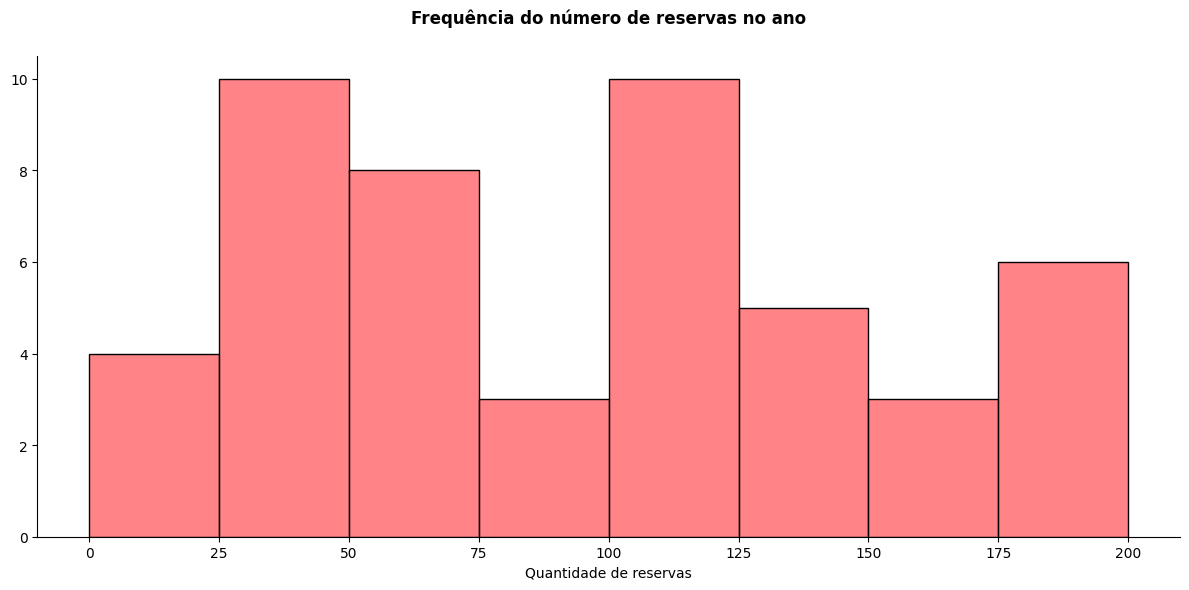

In [75]:
bins = list(range(0,201,25))

# Plotando
plt.figure(figsize=(12,6))
sns.histplot(imoveis_df, x='Número de reservas no ano', bins=bins, color='#ff5a5f')
plt.title('Frequência do número de reservas no ano', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('Quantidade de reservas')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()
plt.show()

In [50]:
imoveis_df['Número de reservas no ano'].describe()

count     49.000000
mean      94.836735
std       55.819780
min        6.000000
25%       46.000000
50%       93.000000
75%      133.000000
max      200.000000
Name: Número de reservas no ano, dtype: float64

Vemos nossas anfitriões tem uma mediana e média em volta de 93 a 94 reservas por ano.
A menor quantidade de reservas em uma estádia foram 6, enquanto a maior foram 200.

#### **Número de Fotos**

/home/matheus/.pyenv/versions/3.11.4/envs/python-alura/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


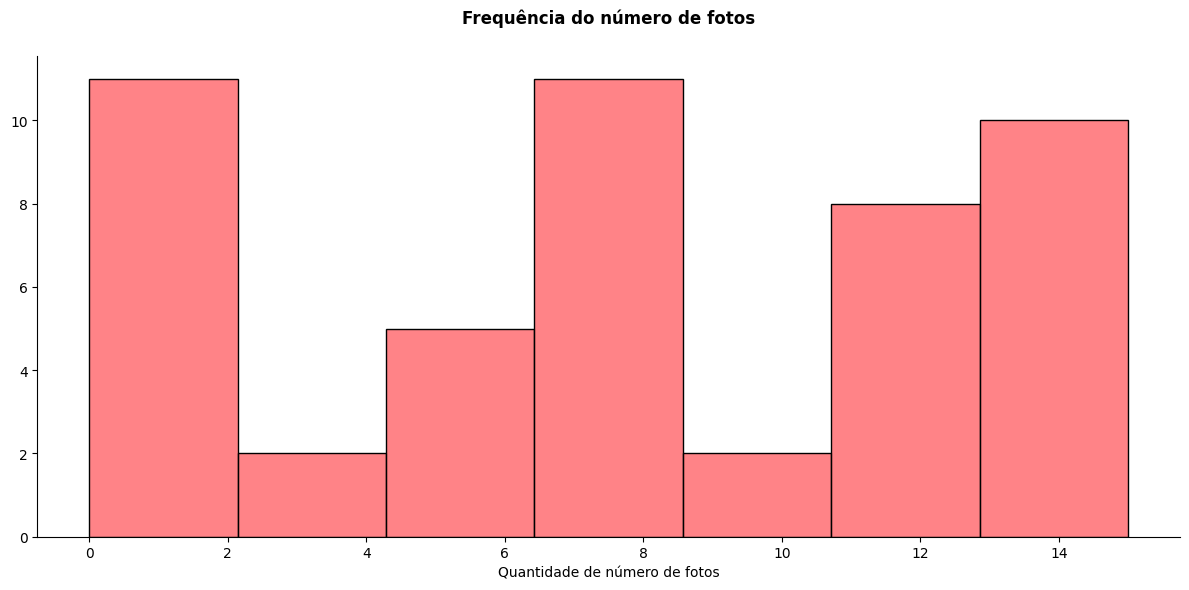

In [77]:
# Plotando
plt.figure(figsize=(12,6))
sns.histplot(imoveis_df, x='Número de Fotos', color='#ff5a5f')
plt.title('Frequência do número de fotos', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('Quantidade de número de fotos')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()
plt.show()

In [52]:
imoveis_df['Número de Fotos'].describe()

count    49.000000
mean      7.693878
std       4.731121
min       0.000000
25%       3.000000
50%       8.000000
75%      12.000000
max      15.000000
Name: Número de Fotos, dtype: float64

Podemos observar que temos muitas estádias que disponibilizam poucas fotos, ou a quantidade máxima, deixando o valor central em volta de 8 fotos por local

## **Insights**

A seguir, faremos uma sequencia de análises a fim de gerar insights sobre características dos 4 principáis países da região da América Latina

#### **Preços por País**

In [53]:
imoveis_df.groupby('País')['Preço'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
País,,,,,,,,
Argentina,10.0,168.10,78.30,10.0,137.00,183.5,223.75,272.0
Brasil,15.0,163.20,81.60,35.0,101.50,170.0,218.50,300.0
Colômbia,14.0,145.93,61.54,30.0,114.75,160.0,193.50,249.0
México,10.0,152.70,72.56,14.0,139.00,156.5,183.25,289.0


- A Argentina tem a maior média de preços, mesmo possuindo o menor preço de hospedagem.

- O Brasil possui o maior desvio padrão e o maior preço de hospedagem.

- A Colômbia tem a menor média de preço e o menor desvio padrão.

- O México possui a maior amplitude (U$ 275) e a menor mediana de preços.

---

#### **Classificação por País**

In [54]:
imoveis_df.groupby('País')['Classificação'].describe()

,count,mean,std,min,25%,50%,75%,max
País,,,,,,,,
Argentina,10.0,4.500000,0.527046,4.0,4.0,4.5,5.0,5.0
Brasil,15.0,3.666667,1.345185,1.0,2.5,4.0,5.0,5.0
Colômbia,14.0,3.857143,1.292412,1.0,3.0,4.0,5.0,5.0
México,10.0,4.100000,1.286684,1.0,4.0,4.5,5.0,5.0


- A Argentina tem a maior classificação média, em destaque sua nota mínima, **4**.

Em resumo, Brasil, Colômbia e México possuem classificações parecidas, com uma diferença de média de 0.5.

---

#### **Média de reservas por País**

Antes, vamos plotar a distribuição de acomodações e a distribuição de reservas por país.

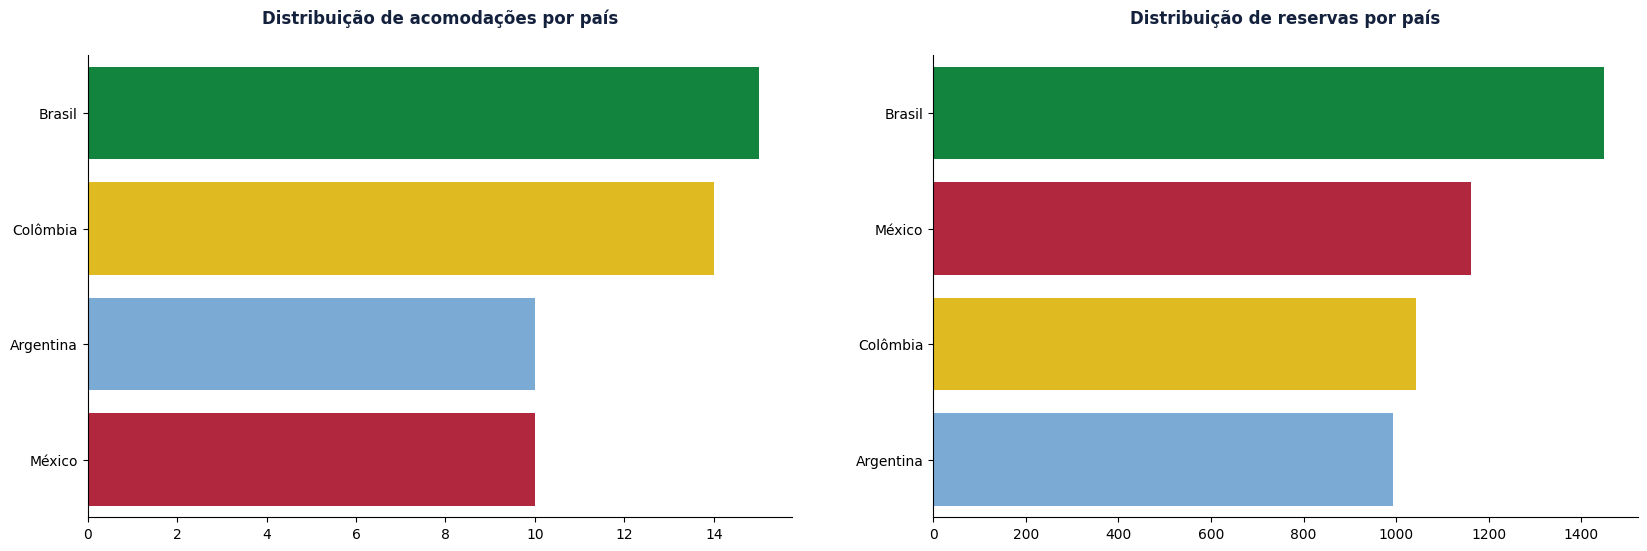

<Figure size 1200x600 with 0 Axes>

In [55]:
order = imoveis_df['País'].value_counts().head().index

cores_latam = {'Argentina':'#6CACE4',
       'Brasil':'#009739',
       'Colômbia':'#FFCD00',
       'México':'#C8102E'}

# Plotando

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
sns.countplot(imoveis_df, y='País', order=order, ax=ax1, palette=cores_latam)
ax1.set_title('Distribuição de acomodações por país', fontsize=12, fontweight='bold', y=1.05, color='#14213d')
ax1.set_xlabel('')
ax1.set_ylabel('')

group = imoveis_df.groupby('País')['Número de reservas no ano'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(12,6))
sns.barplot(x=group.values, y=group.index, ax=ax2, palette=cores_latam)
ax2.set_title('Distribuição de reservas por país', fontsize=12, fontweight='bold', y=1.05, color='#14213d')
ax2.set_xlabel('')
ax2.set_ylabel('')

sns.despine(right=True, ax=ax1)
sns.despine(right=True, ax=ax2)
plt.show()

Agora vamos ver a média das reservas feitas por acomodação em cada país

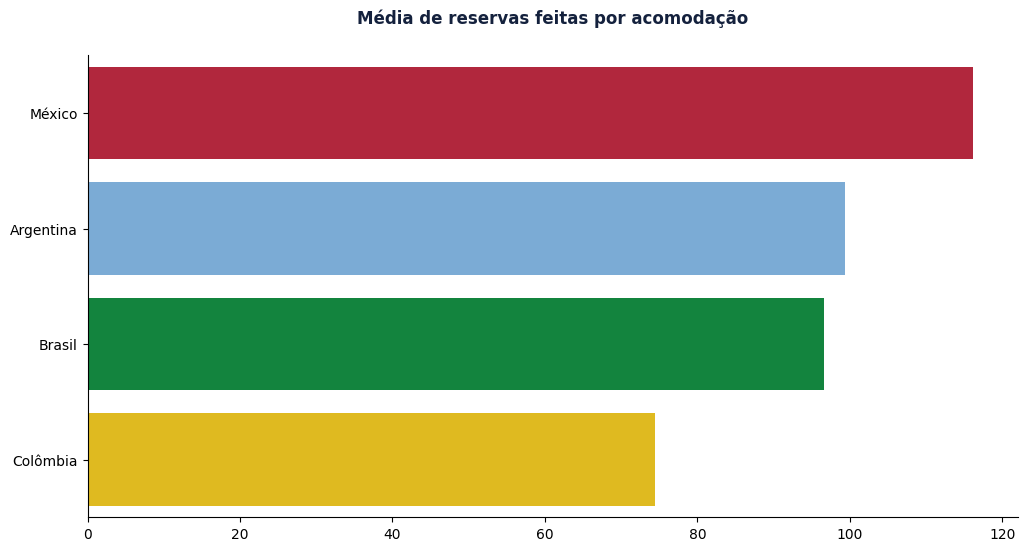

In [56]:
media_reserva_pais = round(imoveis_df.groupby('País')['Número de reservas no ano'].sum() / imoveis_df.groupby('País')['Nome do local'].count(), 2).sort_values(ascending=False)

# Plotando
plt.figure(figsize=(12,6))
sns.barplot(x=media_reserva_pais.values, y=media_reserva_pais.index, palette=cores_latam)
plt.title('Média de reservas feitas por acomodação', fontsize=12, fontweight='bold', y=1.05, color='#14213d')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

Os gráficos anteriores mostram que apesar do México ter o menor número de acomodações em relação aos outros países, eles concentram a maior média de reservas.

Uma estratégia é tentar adquirir mais acomodações no México, visto que é um destino bastante desejado pelos viajantes independente das poucas opções.

---

#### **Faturamento total**

Saber a saúde financeira de sua empresa é vital para o bom funcionamento dos negócios. E um dos principaís KPIs de uma empresa é seu faturamento.

Por isso, vamos investigar o faturamento total dos quatro países principais da região.

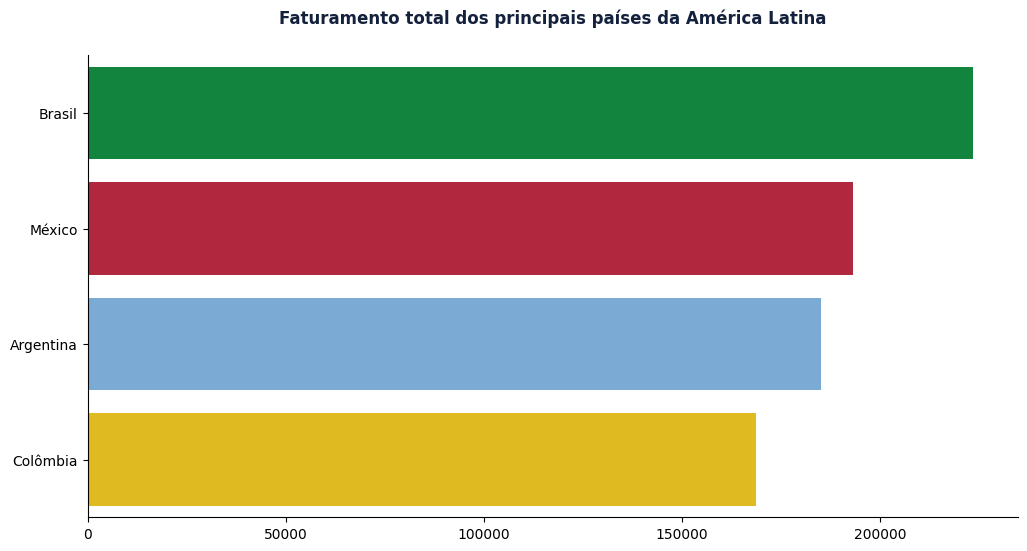

In [57]:
faturamento_df = imoveis_df.copy()
faturamento_df['Faturamento'] = faturamento_df['Preço'] * faturamento_df['Número de reservas no ano']
group = faturamento_df.groupby('País')['Faturamento'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(12,6))
sns.barplot(x=group.values, y=group.index, palette=cores_latam)
plt.title('Faturamento total dos principais países da América Latina', fontsize=12, fontweight='bold', y=1.05, color='#14213d')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

Vemos que o Brasil, com a maior quantidade de acomodações, é o país que mais faturou no ano.

México com a menor quantidade anfriões porém com as menores medias e medianas de preço, tem o segundo melhor faturamento

Enquanto a Colômbia, com a menor média de preços e maior quantidade de acomodações, tem o pior faturamento dos 4 países

---

##### **Faturamento X Acomodação**

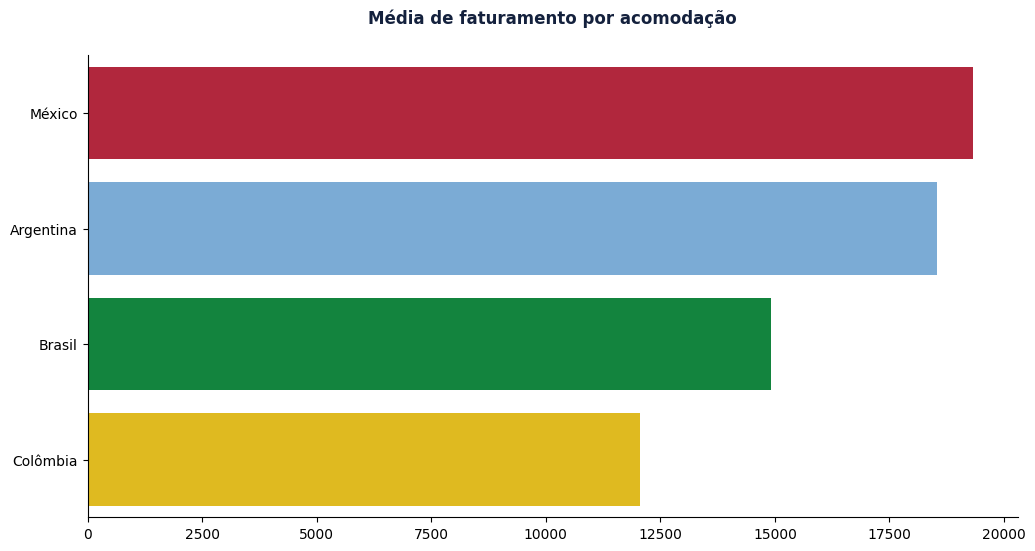

In [58]:
faturamento_df = imoveis_df.copy()
faturamento_df['Faturamento'] = faturamento_df['Preço'] * faturamento_df['Número de reservas no ano']

faturamento_local_pais = round(faturamento_df.groupby('País')['Faturamento'].sum() / faturamento_df.groupby('País')['Nome do local'].count(), 2).sort_values(ascending=False)

# Plotando
plt.figure(figsize=(12,6))
sns.barplot(x=faturamento_local_pais.values, y=faturamento_local_pais.index, palette=cores_latam)
plt.title('Média de faturamento por acomodação', fontsize=12, fontweight='bold', y=1.05, color='#14213d')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

Vemos que o México é o país com maior faturamento por anfitrião, mesmo tendo uma das menores medias e medianas de preço, o que nos leva a acreditar que a quantidade de reservas feitas no país supre a menor quantidade de opções para se hospedar.

---

##### **Faturamento X Reservas**

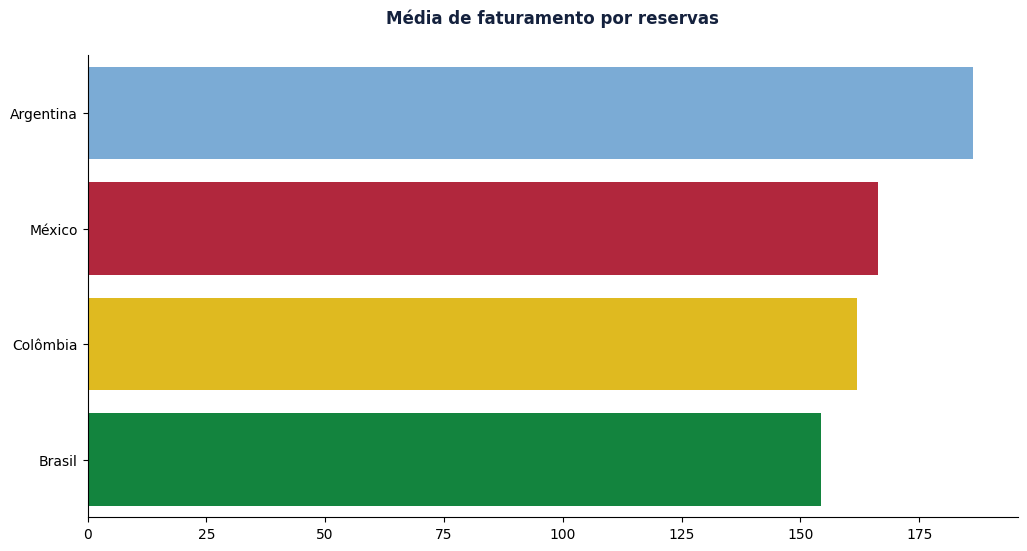

In [59]:
faturamento_reserva_pais = round(faturamento_df.groupby('País')['Faturamento'].sum() / faturamento_df.groupby('País')['Número de reservas no ano'].sum(), 2).sort_values(ascending=False)

# Plotando
plt.figure(figsize=(12,6))
sns.barplot(x=faturamento_reserva_pais.values, y=faturamento_reserva_pais.index, palette=cores_latam)
plt.title('Média de faturamento por reservas', fontsize=12, fontweight='bold', y=1.05, color='#14213d')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

Apesar de ter um menor número de reservas ano, a Argentina, com o maior preço médio, possuí o maior faturamento por reserva entre os 4 países.

#### **Insights gerais**

Podemos perceber que cada país tem sua característica

- O México com sua baixa quantidade de acomodações tem o maior número de reservas e faturamento por acomodação, o que pode ser um **mercado potencial para adquirir novos acomodações**.

- A Argentina compensa a baixa quantidade de acomodações e reservas com a alta média de preço e alta classificação possuindo o maior faturamento por reservas, uma explicativa seria **os destinos terem uma sazonalidade menor, causando um baixo número de reservas e porém maior demanda e preço**.

- O Brasil possui o maior número de acomodações, reservas, faturamento total e variação de preço, **apresentando uma maior opção de destinos e preços para os diferentes tipos de público**.

Entretanto, a Colômbia com o segundo maior número de acomodações e a menor média de preços possui o menor faturamento total e uma baixa procura de reservas por acomodação. Poderiamos fazer **uma análise mais profunda com nossos anfitriões** ou **averiguar causas externas como a segurança e acessibilidade.**

---